In [3]:
import pandas as pd
import networkx as nx
from geopy.distance import geodesic
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('ports_data.csv')
df.head()

,Facility Name,Code,Country,Latitude,Longitude,Type
0,Mundra Port,NaN,India,22.74,69.70,Seaport
1,Nhava Sheva (Jawaharlal Nehru Port),NaN,India,18.93,72.93,Seaport
2,Port of Chennai,NaN,India,13.10,80.30,Seaport
3,Port of Visakhapatnam,NaN,India,17.68,83.30,Seaport
4,Deendayal Port Trust (Kandla),NaN,India,23.02,70.22,Seaport


In [11]:
source = "Mundra Port"
target = "Beijing Capital International Airport"

[('Mundra Port', 'Beijing Capital International Airport')]


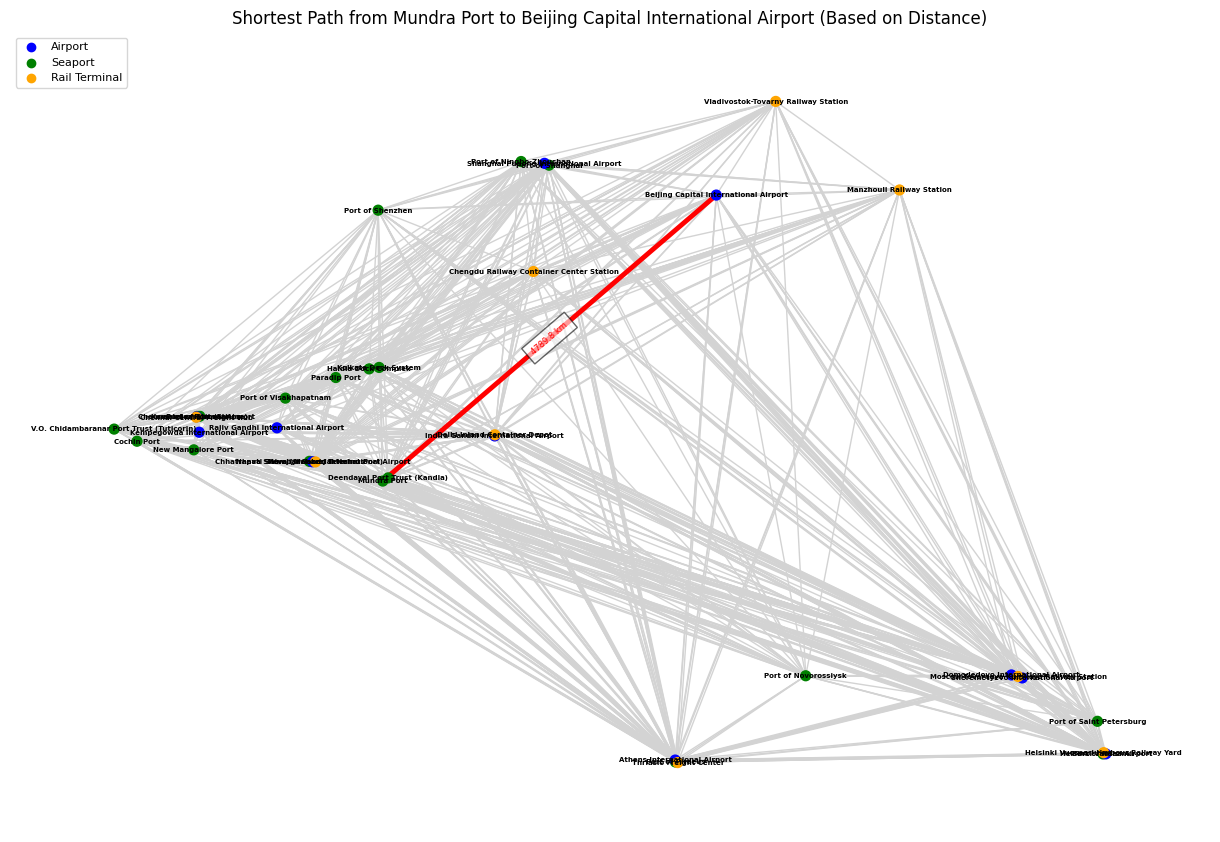

Shortest Path: Mundra Port → Beijing Capital International Airport


In [12]:
# Define node colors based on Type
type_colors = {
    "Airport": "blue",
    "Seaport": "green",
    "Rail Terminal": "orange"
}

# Create a weighted undirected graph
G = nx.Graph()

# Add nodes with positions and type
node_colors = []
for _, row in df.iterrows():
    G.add_node(row["Facility Name"], pos=(row["Latitude"], row["Longitude"]))
    node_colors.append(type_colors[row["Type"]])  # Assign color based on type

# Calculate distances and add weighted edges dynamically
threshold_distance = 5000  # Max distance (in km) to connect facilities

for i, row1 in df.iterrows():
    for j, row2 in df.iterrows():
        if i != j:
            dist = geodesic((row1["Latitude"], row1["Longitude"]), (row2["Latitude"], row2["Longitude"])).km
            # if dist <= threshold_distance:
            G.add_edge(row1["Facility Name"], row2["Facility Name"], weight=round(dist, 1))

# Get positions for nodes
pos = nx.get_node_attributes(G, "pos")

# Choose source and target nodes

# Find the shortest path using Dijkstra's algorithm
try:
    shortest_path = nx.shortest_path(G, source=source, target=target, weight='weight')
    shortest_edges = list(zip(shortest_path, shortest_path[1:]))
    print(shortest_edges)
    
    # Get edge weights for the shortest path
    shortest_edge_labels = {(u, v): f"{G[u][v]['weight']} km" for u, v in shortest_edges}

    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=50, node_color=node_colors, edge_color="lightgray", font_size=5, font_weight="bold")

    # Draw the shortest path in red
    nx.draw_networkx_edges(G, pos, edgelist=shortest_edges, edge_color="red", width=3.5)

    # Draw edge labels for the shortest path
    nx.draw_networkx_edge_labels(G, pos, edge_labels=shortest_edge_labels, font_size=6, font_color="red", bbox=dict(facecolor="white", alpha=0.6))

    # Add legend for node colors
    legend_labels = {
        "blue": "Airport",
        "green": "Seaport",
        "orange": "Rail Terminal"
    }
    for color, label in legend_labels.items():
        plt.scatter([], [], color=color, label=label)
    
    plt.legend(loc="upper left", fontsize=8)
    plt.title(f"Shortest Path from {source} to {target} (Based on Distance)")
    plt.show()

    print("Shortest Path:", " → ".join(shortest_path))

except nx.NetworkXNoPath:
    print(f"No path found between {source} and {target}.")


## using more complex dataset

In [19]:
df = pd.read_csv('logistics_facilities_updated.csv')
df.head()

,Facility Name,Code,Country,Latitude,Longitude,Type,Transit Time (hrs),Distance (km),Border Crossings,Currency
0,Mundra Port,NaN,India,22.74,69.70,Seaport,48,850,"India,China",INR
1,Nhava Sheva (Jawaharlal Nehru Port),NaN,India,18.93,72.93,Seaport,36,700,"India,Russia",INR
2,Port of Chennai,NaN,India,13.10,80.30,Seaport,50,1200,"India,Greece",INR
3,Port of Visakhapatnam,NaN,India,17.68,83.30,Seaport,55,1400,"India,Finland",INR
4,Deendayal Port Trust (Kandla),NaN,India,23.02,70.22,Seaport,42,900,"India,China",INR


**Route Details:**
Mundra Port → Port of Piraeus

🚢 **Segment-wise Details:**
Mundra Port → Port of Piraeus
Distance: 4684.7 km
Transit Time: 42 hrs
Border Crossings: Greece,Russia
Currency: EUR

**Overall Route Summary:**
Total Distance: 4684.7 km
Total Transit Time: 42 hrs
Currencies Involved: EUR



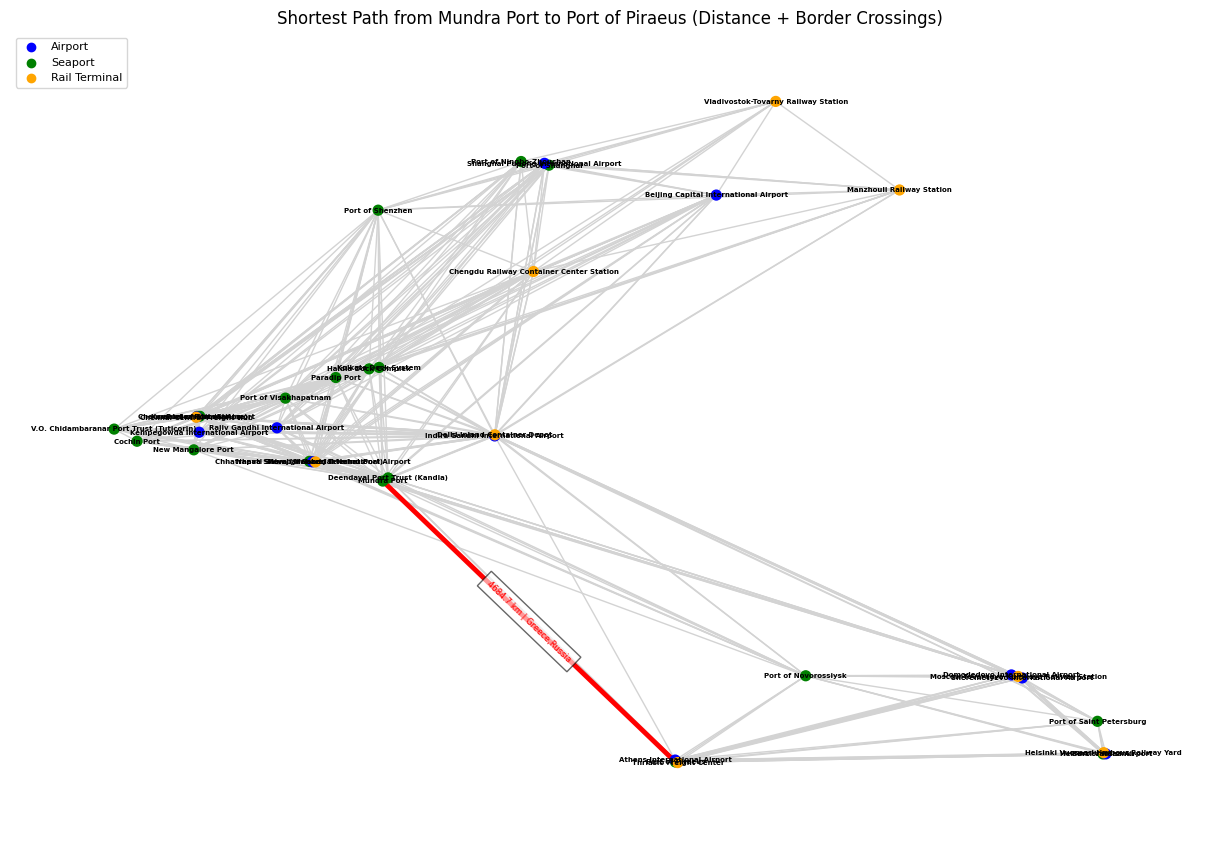

In [25]:
# Define node colors based on Type
type_colors = {
    "Airport": "blue",
    "Seaport": "green",
    "Rail Terminal": "orange"
}

# Create a weighted undirected graph
G = nx.Graph()

# Add nodes with positions and type
for _, row in df.iterrows():
    G.add_node(row["Facility Name"], pos=(row["Latitude"], row["Longitude"]))

# Set max distance threshold for connecting facilities
threshold_distance = 5000  

# Add weighted edges dynamically based on distance
for i, row1 in df.iterrows():
    for j, row2 in df.iterrows():
        if i != j:
            dist = geodesic((row1["Latitude"], row1["Longitude"]), (row2["Latitude"], row2["Longitude"])).km
            if dist <= threshold_distance:
                border_crossings = row1["Border Crossings"] if pd.notna(row1["Border Crossings"]) else "N/A"
                transit_time = row1["Transit Time (hrs)"] if pd.notna(row1["Transit Time (hrs)"]) else 0
                currency = row1["Currency"] if pd.notna(row1["Currency"]) else "Unknown"
                G.add_edge(row1["Facility Name"], row2["Facility Name"], 
                           weight=round(dist, 1), border=border_crossings, transit_time=transit_time, currency=currency)

# Get positions for nodes
pos = nx.get_node_attributes(G, "pos")

# Define source and target
source = "Mundra Port"  # Change as needed
target = "Port of Piraeus"  # Change as needed

# Find the shortest path using Dijkstra's algorithm
if nx.has_path(G, source, target):
    shortest_path = nx.shortest_path(G, source=source, target=target, weight='weight')
    shortest_edges = list(zip(shortest_path, shortest_path[1:]))

    # Initialize totals
    total_distance = 0
    total_transit_time = 0
    unique_currencies = set()

    # Get edge labels for shortest path (Distance + Border Crossings)
    shortest_edge_labels = {}
    print("**Route Details:**")
    print(" → ".join(shortest_path))

    print("\n🚢 **Segment-wise Details:**")
    for u, v in shortest_edges:
        edge_data = G.get_edge_data(u, v)
        distance = edge_data['weight']
        border = edge_data['border']
        transit_time = edge_data['transit_time']
        currency = edge_data['currency']

        shortest_edge_labels[(u, v)] = f"{distance} km | {border}"
        total_distance += distance
        total_transit_time += transit_time
        unique_currencies.add(currency)

        print(f"{u} → {v}")
        print(f"Distance: {distance} km")
        print(f"Transit Time: {transit_time} hrs")
        print(f"Border Crossings: {border}")
        print(f"Currency: {currency}\n")

    # Final statistics
    print("**Overall Route Summary:**")
    print(f"Total Distance: {total_distance} km")
    print(f"Total Transit Time: {total_transit_time} hrs")
    print(f"Currencies Involved: {', '.join(unique_currencies)}\n")

    # Assign node colors based on type
    node_colors = [type_colors[df[df["Facility Name"] == node]["Type"].values[0]] for node in G.nodes()]

    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=50, node_color=node_colors, edge_color="lightgray", font_size=5, font_weight="bold")

    # Draw the shortest path in red
    nx.draw_networkx_edges(G, pos, edgelist=shortest_edges, edge_color="red", width=3.5)

    # Draw edge labels (Distance + Border Crossings)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=shortest_edge_labels, font_size=6, font_color="red", bbox=dict(facecolor="white", alpha=0.6))

    # Add legend for node colors
    legend_labels = {
        "blue": "Airport",
        "green": "Seaport",
        "orange": "Rail Terminal"
    }
    for color, label in legend_labels.items():
        plt.scatter([], [], color=color, label=label)

    plt.legend(loc="upper left", fontsize=8)
    plt.title(f"Shortest Path from {source} to {target} (Distance + Border Crossings)")
    plt.show()
else:
    print(f"No path found between {source} and {target}. The graph might be disconnected.")
